In [20]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [21]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [22]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [23]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [24]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [25]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [26]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [27]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [28]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [29]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [30]:
session.query(Measurement.date).\
    filter(Measurement.date > '2017-07-23').\
    order_by(Measurement.prcp).all()
for row in session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > '2016-08-23').all():
    print(row)

('2016-08-24', 2.0)
('2016-08-25', 2.0)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.3)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 3.3)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.8)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 1.3)
('2016-09-08', 0.0)
('2016-09-09', 0.8)
('2016-09-10', 0.0)
('2016-09-11', 1.3)
('2016-09-12', 0.0)
('2016-09-13', 0.5)
('2016-09-14', 33.5)
('2016-09-15', 10.7)
('2016-09-16', 1.5)
('2016-09-17', 1.3)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.5)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 1.5)
('2016-09-27', 0.5)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('2016-10-12', 0

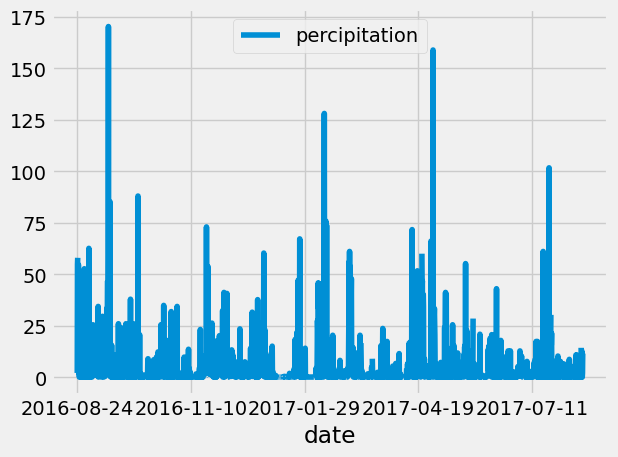

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
sel = [Measurement.date,
       Measurement.prcp]
Percipitation_data = session.query(*sel).\
    filter(Measurement.date > '2016-08-23').\
    order_by(Measurement.date).all()

Percipitation_df = pd.DataFrame(Percipitation_data, columns=['date','percipitation'])
Percipitation_df.set_index('date', inplace=True)
Percipitation_df.plot.line()
plt.tight_layout()
plt.show()

In [32]:
# Use Pandas to calculate the summary statistics for the precipitation data
Percipitation_df.describe()

,percipitation
count,2015.000000
mean,4.485112
std,11.690532
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [33]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()

9

In [34]:
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [35]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
sel = [Measurement.date,
       Measurement.station]
Station_data = session.query(*sel).\
    order_by(Measurement.station).all()

# Station_data
Station_df = pd.DataFrame(Station_data, columns=['date','station'])
Station_counts = Station_df.groupby(Station_df.station, as_index=False).size()
Order_station_by_value = Station_counts.sort_values(by=['size'],ascending=False)
Order_station_by_value

,station,size
6,USC00519281,2772
7,USC00519397,2724
1,USC00513117,2709
8,USC00519523,2669
3,USC00516128,2612
2,USC00514830,2202
0,USC00511918,1979
4,USC00517948,1372
5,USC00518838,511


In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# USC00519281 is the most active station
sel = [Measurement.date,
       Measurement.tobs]
Temperature_filtered_data = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()

Temperature_df = pd.DataFrame(Temperature_filtered_data, columns=['date','tobs'])
print(Temperature_df['tobs'].min())
print(Temperature_df['tobs'].max())
print(Temperature_df['tobs'].mean())

12.2
29.4
22.035822510822513


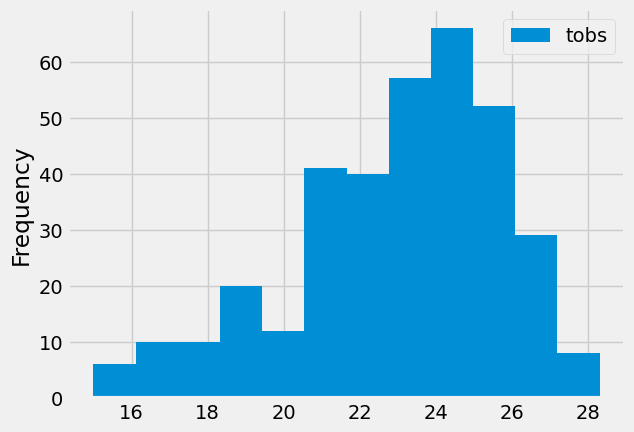

In [37]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.date,
       Measurement.station,
       Measurement.tobs]
temp_one_year_ago = session.query(*sel).\
    filter(Measurement.date > '2016-08-23').\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.tobs).all()

bar_df = pd.DataFrame(temp_one_year_ago, columns=['date','station','tobs'])

ax = bar_df.plot.hist(bins=12)


# Close Session

In [19]:
# Close Session
session.close()